## Geospatial Analysis

In [2]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
file_path = r'C:\Users\Lenovo\Documents\GitHub\TheUltimate pandas bootcamp\Cognifyz-Data-Mastery-Program\DATASETS\Dataset .csv'
DATASET = pd.read_csv(file_path)

Visualize and analyze the locations of restaurants based on their latitude and longitude to understand their geographical distribution across cities.

In [4]:
avg_lat = DATASET['Latitude'].mean()
avg_lon = DATASET['Longitude'].mean()
map_restaurants = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)
print("AVERAGE LATITUDE",avg_lat)
print("AVERAGE LONGITUDE",avg_lon)

AVERAGE LATITUDE 25.854380700074756
AVERAGE LONGITUDE 64.12657446168706


In [5]:
for _, row in DATASET.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} - {row['City']}",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(map_restaurants)

In [6]:
map_restaurants.save("restaurant_map.html")
print("Map has been saved as 'restaurant_map.html'. Open this file in a browser to view the interactive map.")

Map has been saved as 'restaurant_map.html'. Open this file in a browser to view the interactive map.


Distribution Analysis Using Seaborn:
Visualize the density of restaurants on a static map.

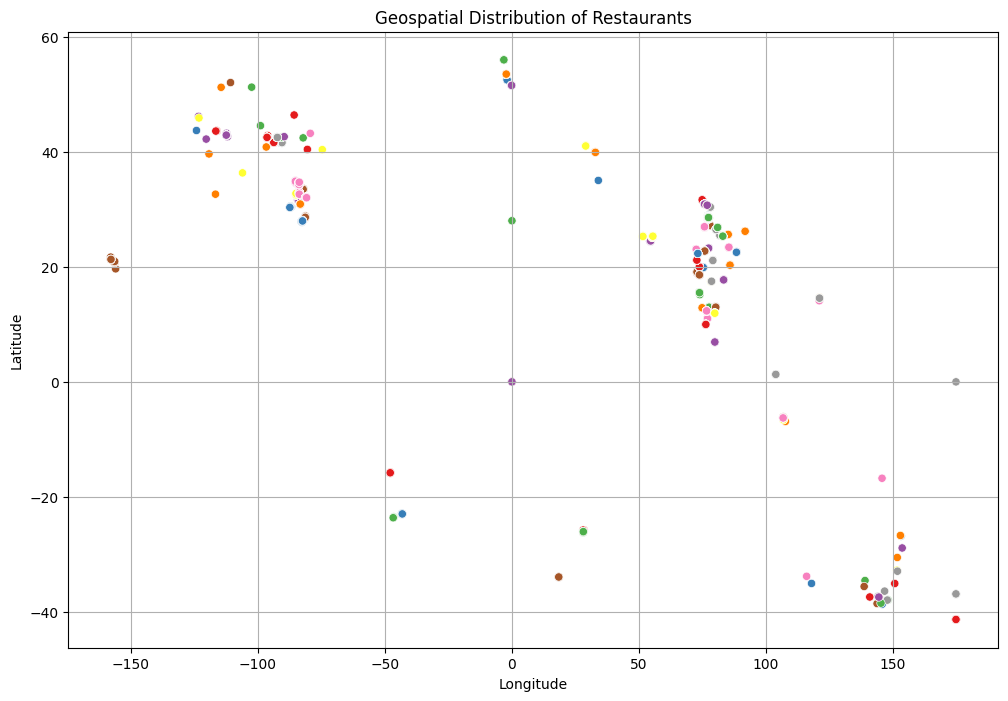

In [7]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=DATASET, hue='City', palette='Set1', legend=False)
plt.title('Geospatial Distribution of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

- **`sns.scatterplot()`**: Plots restaurant locations, colored by `City`.
- **Grid and Labels**: Help to understand the spread of locations geographically.

Geospatial Clustering (Advanced):
You can perform clustering to identify hot spots of restaurants using scikit-learn.

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# Extract coordinates for clustering
coordinates = DATASET[['Latitude', 'Longitude']].dropna()
kmeans = KMeans(n_clusters=5)  # Adjust the number of clusters as needed
kmeans.fit(coordinates)

KMeans(n_clusters=5)

In [10]:
DATASET['Cluster'] = kmeans.predict(DATASET[['Latitude', 'Longitude']])

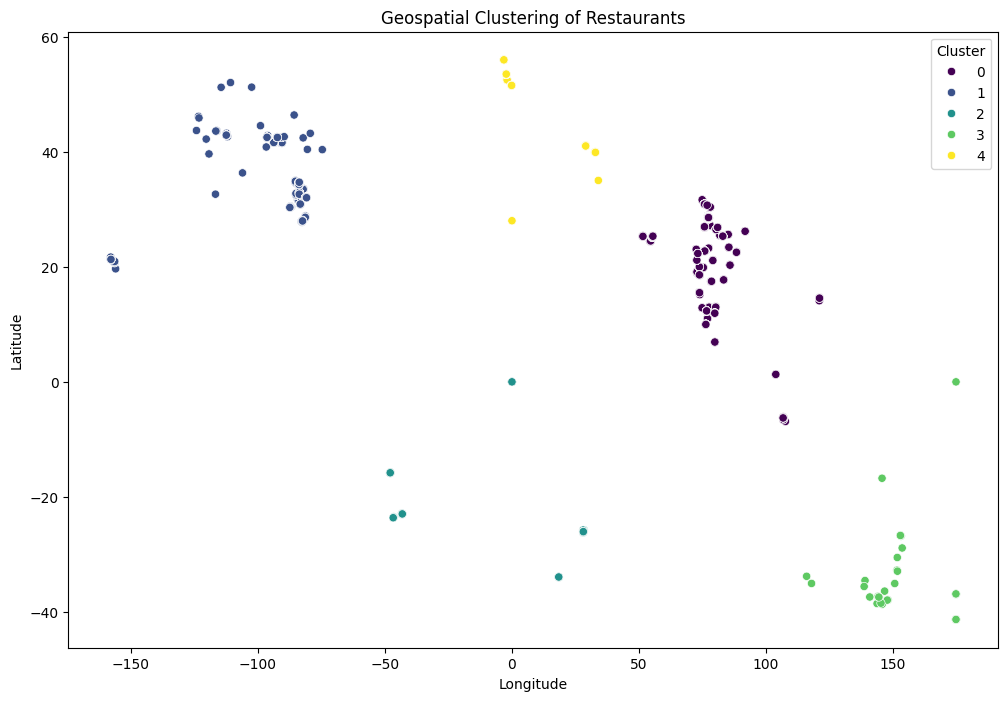

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Cluster', data=DATASET, palette='viridis')
plt.title('Geospatial Clustering of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

- **`KMeans` Clustering**: Groups locations into clusters to identify high-density areas.
- **Visualization**: Colors represent different clusters, helping identify where restaurant concentrations are highest.

- **Concentration Patterns**: Are there more restaurants in specific cities or areas?
- **Outliers**: Are there restaurants located far from others, indicating potential new market exploration?
- **Clusters**: Are there multiple clusters in a city, hinting at popular dining districts?

Geospatial analysis helps visualize the spread and concentration of restaurants across different regions. By using tools like folium for interactive maps and matplotlib/seaborn for static plots, you can gain a comprehensive understanding of the geographical aspects of the data.